# Cool Data Presentation - Rock Paper Scissors Dataset
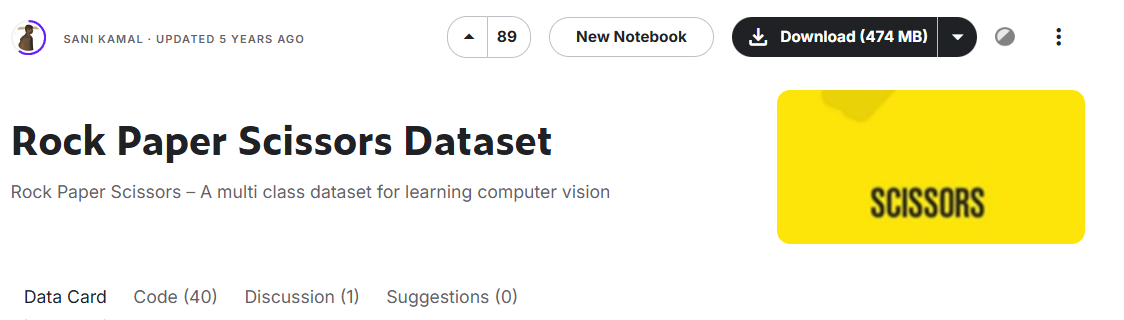
## Presenter: Haochen (Harry) Li

## 1. Dataset Overview
### 1.1 Dataset Curator
Laurence Moroney (lmoroney@gmail.com / laurencemoroney.com)

### 1.2 Dataset Link
Kaggle: https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset/data <br>
Original source: http://www.laurencemoroney.com/rock-paper-scissors-dataset/ <br>
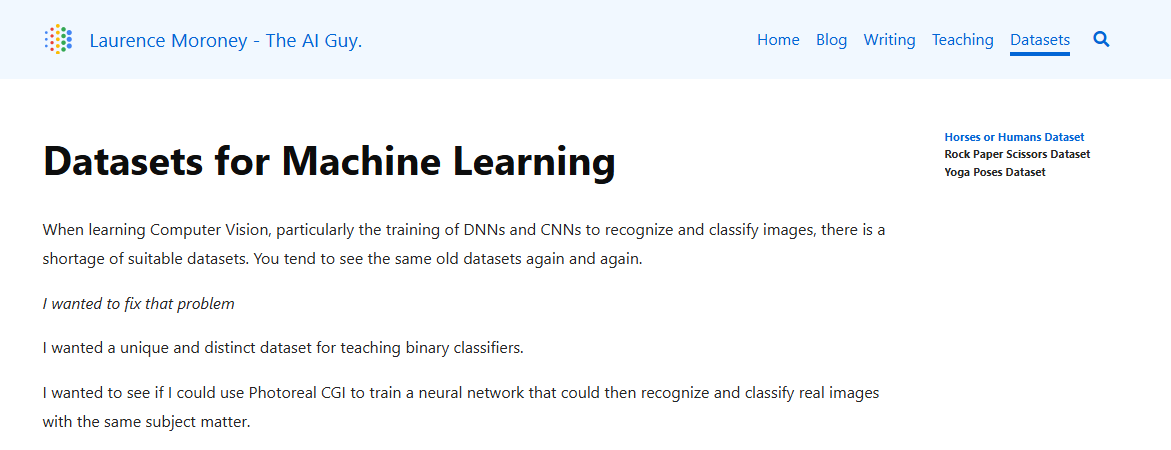

### 1.3 License
(Copied from Kaggle dataset webpage)
The dataset is licensed as a <a href = "https://creativecommons.org/licenses/by/2.0/">CC By 2.0</a>, free for you to <b>share and adapt</b> for all uses, commercial or non-commercial. Please just <b>attribute</b> and give appropriate credit to Laurence Moroney (lmoroney@gmail.com / laurencemoroney.com), and place no additional restrictions on your users as outlined here.



Share any analysis that has previously been done with the dataset <br>

Short demo using the dataset (or a small subset of the dataset) - remember, the whole presentation MUST be <5 mins

## 2. Data Analysis

## 3. Demo
